<a href="https://colab.research.google.com/github/ritahnabaweesi/Multiple-Linear-regession/blob/main/Machine_Learning_Cervical_cancer_risk_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING-BASED CLASSIFICATION MODEL
# FOR CERVICAL CANCER RISK FACTORS THAT LEAD TO BIOPSY EXAMINATION



#Project Collaborators:

1. OLAYINKA MOGAJI: 30159749
2. CINDY DAI: 00211926
3. RITAH NABAWEESI: 30168159





# INTRODUCTION

Cervical cancer remains a formidable global health challenge, disproportionately affecting women across the world. It is one of the most prevalent forms of cancer and a leading cause of mortality among women, particularly in low and middle-income countries. Early detection and timely intervention are pivotal in reducing the burden of this disease and improving patient outcomes. As such, the identification of risk factors and the development of effective methods for early detection are of utmost importance.​

Advancements in machine learning and data analysis have provided researchers with powerful tools to explore complex medical datasets and derive valuable insights. In this project, we aim to harness the potential of machine learning algorithms to analyze a relevant dataset from the UCI Machine Learning Repository. By applying these algorithms, our objective is to build a model that can classify whether a set of risk factors influence the decision to undergo a cervical biopsy.​

# OBJECTIVE

The main objective of this study is to build a classification model for cervical risk factors that predicts the decision to take a cervical cancer biopsy.

# GUIDING QUESTIONS

To achieve the set objective, the study is hinged on two major guiding questions:
1. What are the major risk factors for cervical cancer?
2. Which classification model is best suited to predict the need for a cervical cancer biopsy based on the set of risk factors?

# DATASET
We used the Cervical Cancer (Risk Factors) data set obtained from UCI Machine Learning repository. The dataset comprises of historic medical records of 858 patients collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. It contains demographic information, habits, and medical records of the patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).[1]

## Details about the data set

* Data set characteristics: Multivariate
* Subject area: Life
* Associated tasks: Classification
* Attribute type: Integer, Real
* Instances: 858
* Attributes: 36

# Attribute Information
The data set has a number of risk factors for cervical cancer leading to biopsy examination such as Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, Smokes (years), Smokes (packs/year), Hormonal Contraceptives, Hormonal Contraceptives (years), IUD, IUD (years), STDs, STDs (number), STDs: condylomatosis, STDs: cervical condylomatosis, STDs: vaginal condylomatosis, STDs: vulvo-perineal condylomatosis, STDs: syphilis, STDs: pelvic inflammatory disease, STDs: genital herpes, STDs: molluscum contagiosum, STDs: AIDS, STDs: HIV, STDs: Hepatitis B, STDs: HPV, STDs: Number of diagnosis, STDs: Time since first diagnosis, STDs: Time since last diagnosis, Dx: Cancer, Dx: CIN, Dx: HPV, and Dx.

The target variables in the data set are Hinselmann, Schiller, Citology, Biopsy. The focus target variable for the project will be Biopsy.







# METHODOLOGY

The subsequent sections of this paper detail the methodology that was adopted for this study. In summary, the methodology that was taken to accomplish the set objectives and reported results was:
1.	Prepare the data set for machine learning
2.	Perform exploratory data analysis
3.	Perform the model training and testing using various machine learning algorithms
4.	Apply dimensionality reduction techniques to the dataset and retest the models
5.	Model assessment
6.	Report results from the models

The models are built built using the python machine learning library Scikit learn.


# Prepare Data set for Machine learning

Import the necessary libraries

In [55]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
import xgboost as xgb

To kickstart the process, the data was loaded as a pandas data frame.

In [2]:
drive.mount("/content/drive")
df =  pd.read_csv("/content/drive/My Drive/DATA 608 Project/risk_factors_cervical_cancer.csv")
df.head()

Mounted at /content/drive


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


The data set has four target variables; Hinselmann, Schiller, Citology and Biopsy. The focus target variable is Biopsy hence the other target variables are to be dropped.

In [3]:
#drop the target variables that aren't the focus for the study
df.drop(['Hinselmann','Schiller','Citology'], axis = 1, inplace = True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,?,?,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0


# Exploratory Data Analysis

The purpose of exploratory data analysis is to gain insights into the data, the relationships between variables and any emerging trends and patterns within the data.

In the preliminary stages, general information such as the data types of the variables, count and distribution of the missing values will be obtained. We will proceed to investigate the distributions of the target and predictor variables and the relationships between the two sets of variables.


In [4]:
#view summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Of the 33 columns in the dataset, only 7 columns are of data type integer. We need to change the data types of the other columns as well

In [5]:
colnames = ['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)',
            'Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis',
            'STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis',
            'STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV',
            'STDs:Hepatitis B','STDs:HPV','STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

for col in colnames:
  df[col] = pd.to_numeric(df[col], errors = "coerce")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

The datatypes for all the columns are now aligned to numeric.

## Explore the distribution of the target variable Biopsy

In [7]:
df['Biopsy'].value_counts()/float(len(df))

0    0.935897
1    0.064103
Name: Biopsy, dtype: float64

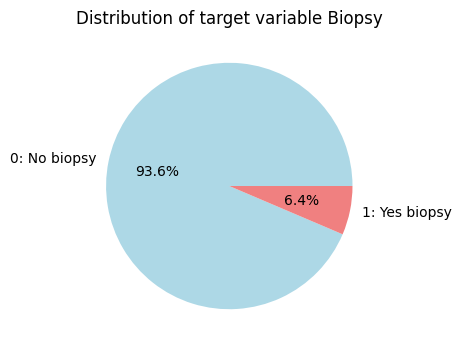

In [8]:
proportions = [0.935897, 0.064103]
labels = ['0: No biopsy', '1: Yes biopsy']
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(4,4))
plt.pie(proportions,labels=labels, colors = colors,autopct='%1.1f%%')
plt.title("Distribution of target variable Biopsy")
plt.show()


The dataset is unbalanced, with 93.6% of the data in one class 0 which is the class where no biopsy is needed and the remaining 6.4% of the data in class 1 where the biopsy is needed. Based on this class distribution, there is a heavy class imbalance which might affect the overall prediction accuracy and a likelihood of overfitting the training data.

## Handling of missing values


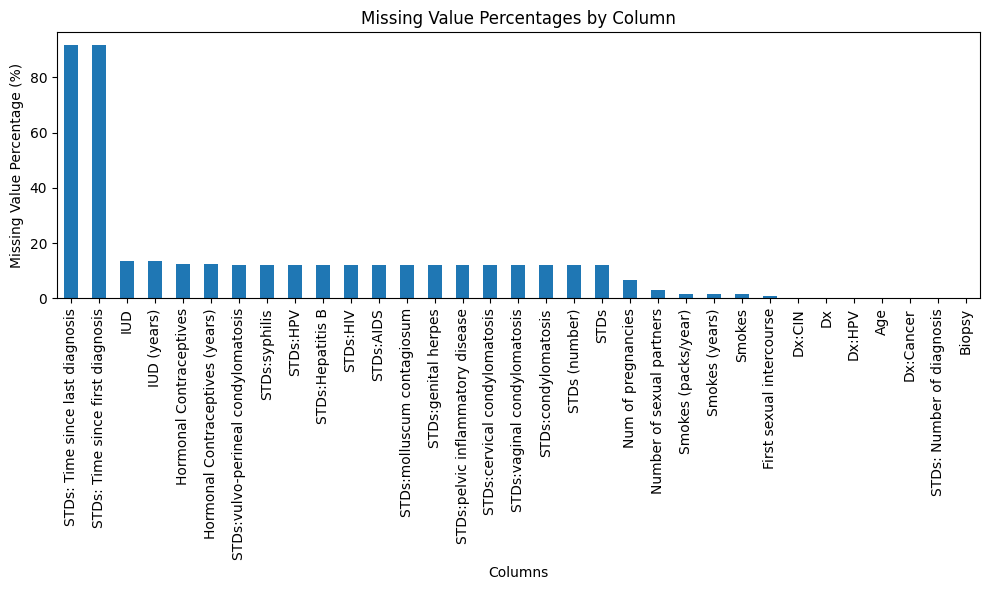

In [10]:
#compute the percentage of the missing values as a proprtion of the total number of records
missing_values = df.isna().sum()/(len(df))*100

missing_percentages_sorted = missing_values.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
missing_percentages_sorted.plot(kind='bar')
plt.title('Missing Value Percentages by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Value Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The dataset has a number of missing values since some patients decided not to answer some of the questions due to privacy concerns[1]. 91.72% of the data points in the variables "STDs: Time since first diagnosis" and "STDs: Time since last diagnosis" are missing values. Due to the high proportions of missing values and the lack of any attribute dependencies that can be used to derive the missing values, these two variables will be dropped.

The proportion of missing values in the other variables is less than 15%, which is manageable. These missing values will be imputed, that is, filled with appropriate values. Inorder to lessen the risk of data leakage and overfitting, the imputation of the missing values will be performed after the data is split into trainining and test datasets.

In [11]:
#drop the two variables with high proportions of missing values
df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis = 1, inplace = True)

## Explore the distribution of the quantitative variables

The quantitative variables within the data set are: Age, Number of sexual partners, first sexual intercourse, num of pregnancies, smokes (years), smokes(packs/year), hormonal contarceptives (years) and IUD (years).

Exploring the distribution of the variables is key as the shape of the data has an influence on the choice of the imputation method adopted for the missing values. This is detailed in the next section.

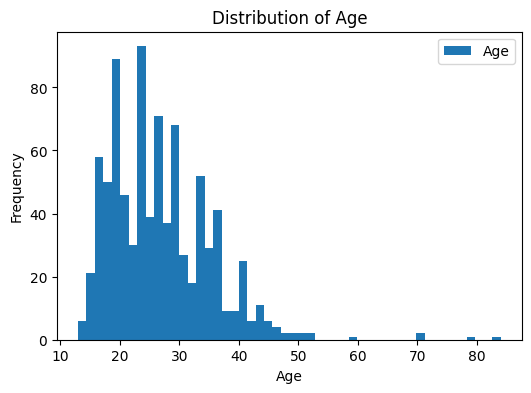

In [13]:
plt.rcParams['figure.figsize']=(6,4)

#df_1 = df[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies','Smokes (years)',
              # 'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)']]
df['Age'].plot(kind='hist', bins=50)
plt.xlabel("Age")
plt.title("Distribution of Age")
plt.legend()
plt.show()

The distribution of Age within the dataset is left skewed. The majority of the patients are within the 20-30 age bracket.

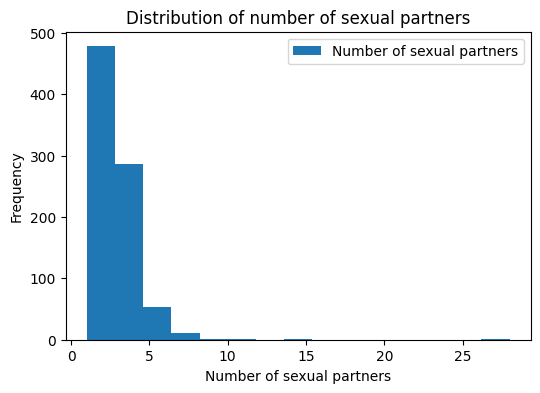

In [14]:
df['Number of sexual partners'].plot(kind='hist', bins=15)
plt.xlabel("Number of sexual partners")
plt.title("Distribution of number of sexual partners")
plt.legend()
plt.show()

The number of sexual partners ranges from 0 to 28. Majority of the patients have had less 3 sexual partners. The distribution of number of sexual partners is left skewed.

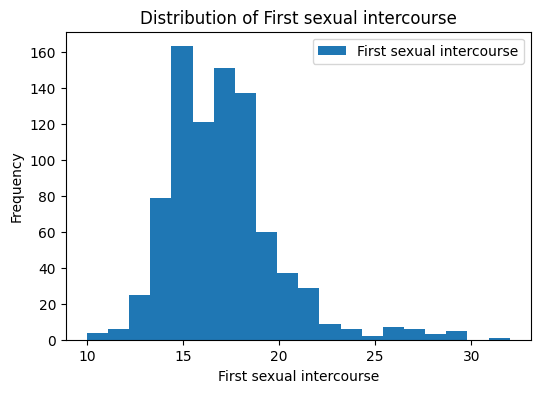

In [15]:
df['First sexual intercourse'].plot(kind='hist', bins=20)
plt.xlabel("First sexual intercourse")
plt.title("Distribution of First sexual intercourse")
plt.legend()
plt.show()

In the histogram representation, the age of initial sexual intercourse spans a range of 10 to 32 years. The distribution exhibits a minor leftward skew, with the peak occurrence of first sexual intercourses observed around the age of 15

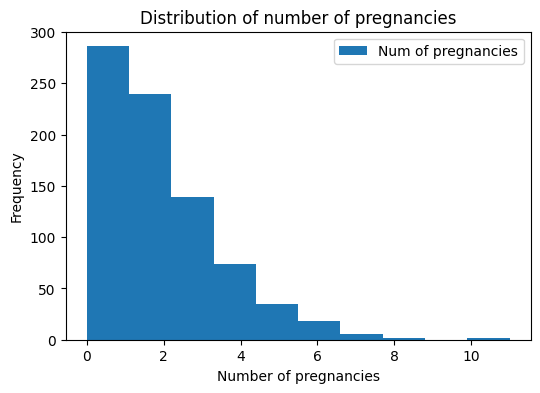

In [16]:
df['Num of pregnancies'].plot(kind='hist', bins=10)
plt.xlabel("Number of pregnancies")
plt.title("Distribution of number of pregnancies")
plt.legend()
plt.show()

In the histogram representation of the number of pregnancies, the number of pregnancies range from 0 to 11. The distribution is left skewed, with the peak number of pregnancies being 1.

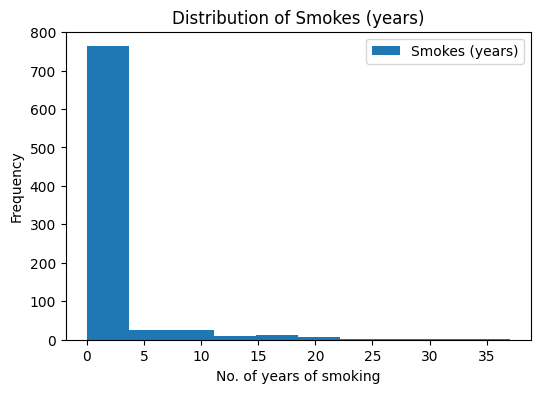

In [17]:
df['Smokes (years)'].plot(kind='hist', bins=10)
plt.xlabel("No. of years of smoking")
plt.title("Distribution of Smokes (years)")
plt.legend()
plt.show()

The span of smoking duration varies between 0 and 37 years, with the most prevalent period falling within 0 to 4 years. The distribution displays a leftward skewness, prominently concentrated among patients who have smoked for less than 5 years.

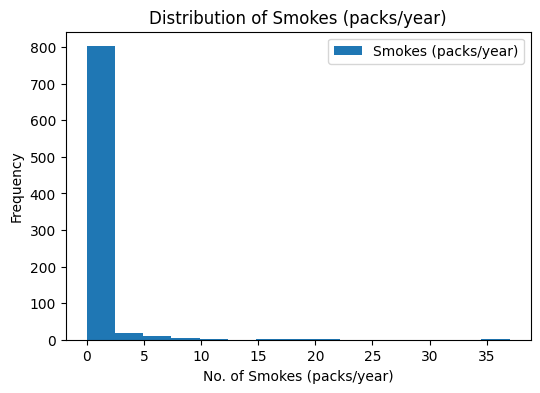

In [18]:
df['Smokes (packs/year)'].plot(kind='hist', bins=15)
plt.xlabel("No. of Smokes (packs/year)")
plt.title("Distribution of Smokes (packs/year)")
plt.legend()
plt.show()

The span of smokes (packs/year) varies between 0 and 37 years, with the most prevalent number of packs under 2 packs per year. The distribution displays a leftward skewness, prominently concentrated among patients who have less than 5 packs per year.

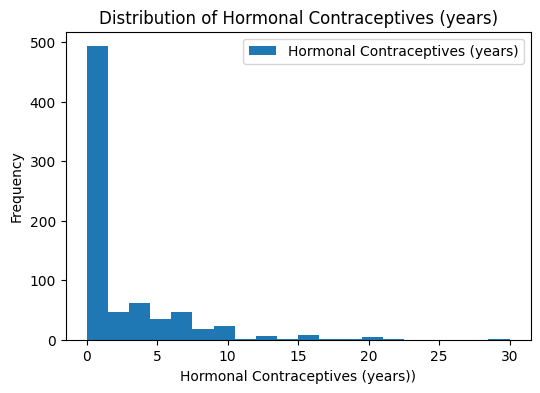

In [19]:
df['Hormonal Contraceptives (years)'].plot(kind='hist', bins=20)
plt.xlabel("Hormonal Contraceptives (years))")
plt.title("Distribution of Hormonal Contraceptives (years)")
plt.legend()
plt.show()

The range of years during which a patient has used hormonal contraceptives extends from 0 to 30 years, with the peak occurring within the interval of 0 to 1 year. The distribution displays a leftward skew.

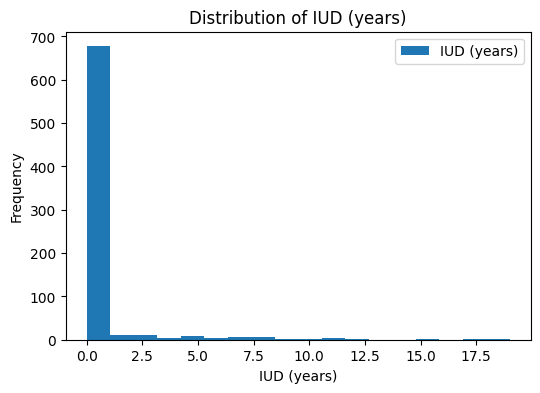

In [20]:
df['IUD (years)'].plot(kind='hist', bins=18)
plt.xlabel("IUD (years)")
plt.title("Distribution of IUD (years)")
plt.legend()
plt.show()

The duration of intrauterine device (IUD) usage among patients spans from 0 to 17.5 years. The majority of patients have not utilized IUDs at all. The distribution exhibits a leftward skew, prominently centered around patients who have used IUDs for durations shorter than 1 year.

## Explore the correlation of the variables with the response variable

In the next section, we explore the existence or lack of relationship between the variables. Depending on the nature of relationship, whether positive, negative or a lack of relationship, a change in one variable might have an effect on another variable in the dataset.

The strength and direction of the relationship will be measured using spearman's correlation coefficient.

In [21]:
#Compute the correlation coefficients
correlation = df.corr()
correlation['Biopsy'].sort_values(ascending=False)

Biopsy                                1.000000
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.132526
STDs:HIV                              0.126880
Dx:CIN                                0.113172
STDs                                  0.109099
STDs (number)                         0.098347
STDs: Number of diagnosis             0.097449
STDs:vulvo-perineal condylomatosis    0.088902
STDs:condylomatosis                   0.086390
Hormonal Contraceptives (years)       0.079388
Smokes (years)                        0.062044
Age                                   0.055956
IUD                                   0.053194
Num of pregnancies                    0.046416
IUD (years)                           0.033275
Smokes                                0.029356
Smokes (packs/year)                   0.024882
Hormonal Contraceptives               0.007750
First sexual 

The predictor variables exhibit minimal correlation coefficients (below 0.2) in relation to the response variable, Biopsy. Positive correlation coefficients denote a favorable connection between a predictor variable and the response variable, Biopsy. Conversely, negative coefficients indicate an adverse relationship. A positive correlation coefficient implies that variations in the predictor variable bring about corresponding changes in the response variable, both moving in the same direction. Conversely, this direction is reversed in the case of negative correlation coefficients.

A drill down of the correlation coeeficients between the response variable Biopsy and the quantitative predictors follows.

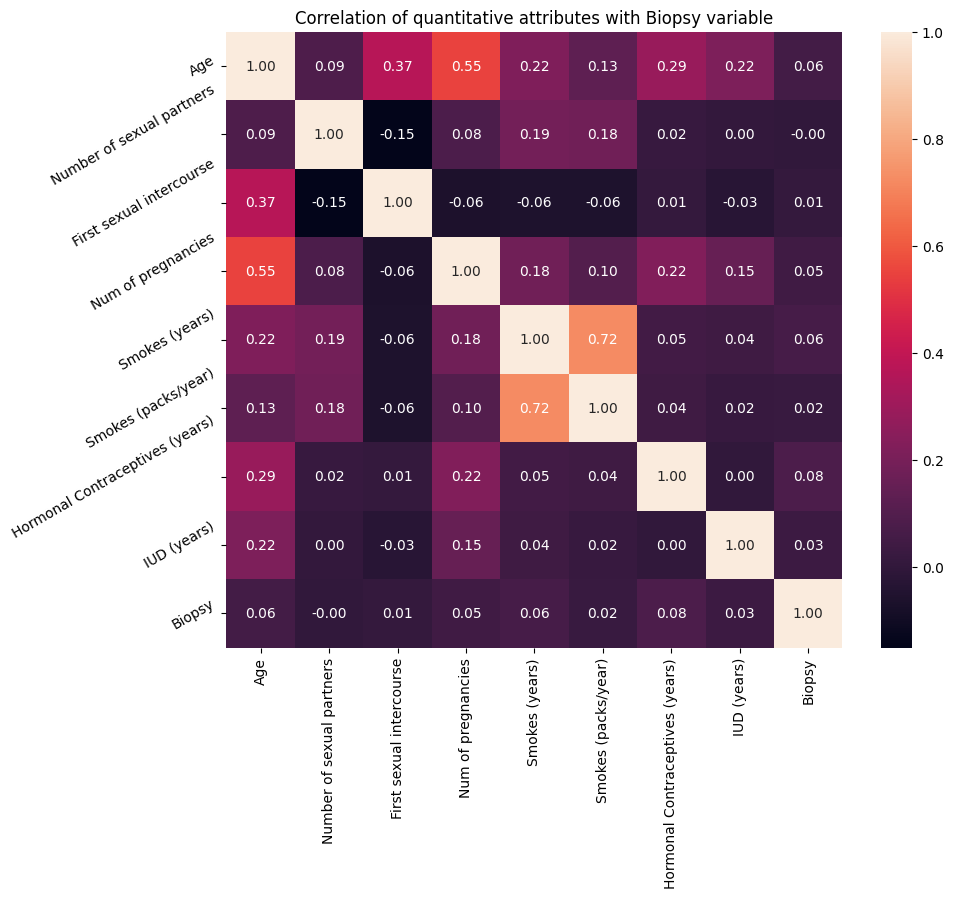

In [22]:
#Focus on the quantitative variables and Biopsy
df_3 = df[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies','Smokes (years)',
               'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','Biopsy']]

correlation_2 = df_3.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation of quantitative attributes with Biopsy variable')
a = sns.heatmap(correlation_2, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()



In the correlation matrix, which compares the relationships between quantitative variables and the Biopsy response variable, the most substantial positive correlation, measuring 0.72, is observed between the variables "Smokes (years)" and "Smokes (packs/year)." Additionally, a robust positive correlation coefficient of 0.55 exists between the variables "Number of pregnancies" and "Age." The observed posive correlations between these variable pairs indicate that an increase in one variable will result in an increase in the other variable by a factor close to the correlation coefficients.

## Split the data into test and train sets

The dataset will be split into training and test sets prior to building the models. The purpose of the training set is to train the model to learn patterns and relationships in the data. The model learns the coefficients and parameters that minimize the error on the training data.

After training, we evaluate the model's performance on unseen data, which is the test set. This evaluation tells us how well our model(s) generalizes to new, previously unseen data. This evaluation gives you a better indication of how well our model(s) will perform on new, real-world data. This is a test - validation approach to model building.

The approach also helps to minimize the occurence of overfitting. Overfitting occurs when the model learns the noise in the data rather than the underlying patterns, and it performs poorly on new data.

In [23]:
#declare the feature vector and target variable
X = df.drop(['Biopsy'], axis  = 1)
y = df['Biopsy']

#split the X and Y into train and test sets using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#check the shape of X_train and X_test
X_train.shape, X_test.shape

((686, 30), (172, 30))

From the 80/20 random split of the dataset, the training set has 686 records with 30 variables while the test set has 172 records with the same number of variables, 30.

A check of the missing values in the test and train sets follows.

In [24]:
X_train.isna().sum()

Age                                    0
Number of sexual partners             23
First sexual intercourse               7
Num of pregnancies                    44
Smokes                                11
Smokes (years)                        11
Smokes (packs/year)                   11
Hormonal Contraceptives               88
Hormonal Contraceptives (years)       88
IUD                                   98
IUD (years)                           98
STDs                                  90
STDs (number)                         90
STDs:condylomatosis                   90
STDs:cervical condylomatosis          90
STDs:vaginal condylomatosis           90
STDs:vulvo-perineal condylomatosis    90
STDs:syphilis                         90
STDs:pelvic inflammatory disease      90
STDs:genital herpes                   90
STDs:molluscum contagiosum            90
STDs:AIDS                             90
STDs:HIV                              90
STDs:Hepatitis B                      90
STDs:HPV        

In [25]:
X_test.isna().sum()

Age                                    0
Number of sexual partners              3
First sexual intercourse               0
Num of pregnancies                    12
Smokes                                 2
Smokes (years)                         2
Smokes (packs/year)                    2
Hormonal Contraceptives               20
Hormonal Contraceptives (years)       20
IUD                                   19
IUD (years)                           19
STDs                                  15
STDs (number)                         15
STDs:condylomatosis                   15
STDs:cervical condylomatosis          15
STDs:vaginal condylomatosis           15
STDs:vulvo-perineal condylomatosis    15
STDs:syphilis                         15
STDs:pelvic inflammatory disease      15
STDs:genital herpes                   15
STDs:molluscum contagiosum            15
STDs:AIDS                             15
STDs:HIV                              15
STDs:Hepatitis B                      15
STDs:HPV        

Missing values in both the training and test sets will undergo separate imputation procedures. Employing the K-Nearest Neighbors (KNN) technique will capitalize on its heightened accuracy compared to conventional imputation methods like mean or median.

It's worth noting that the imputation process will exclusively focus on the predictor variables. Since the KNN approach computes averages from the nearest neighbors within a specified vicinity, it's possible that binary predictor variables might not be precisely zero or one after imputation. To address this concern, the imputed values for the binary columns will be rounded to either zero or one, mitigating any discrepancies.

In [29]:
#impute the missing values using KNN, with K=5 neighbours
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False, keep_empty_features=False)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train[:]),
                  columns = X_train.columns)

#Identify the binary variables and round the imputed values to either 1 or 0
binary_cols = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis',
             'STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV',
             ]

for col in binary_cols:
  X_train_imputed[col] = X_train_imputed[col].apply(lambda x: 1 if x >= 0.5 else 0)

#Check the count of the null values in the imputed dataset
X_train_imputed.isna().sum()


Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


The imputation is working correctly as there are no missing values within the training set. The same approach is taken to impute the missing values within the test set

In [30]:
#Check the distribution of one of the binary variables to confirm that the encoding is right, 0 and 1
X_train_imputed['Smokes'].value_counts()


0    593
1     93
Name: Smokes, dtype: int64

In [31]:
#Replicating the imputation on the test data
X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test[:]),
                  columns = X_test.columns)

#Identify the binary variables and round the imputed values to either 1 or 0
binary_cols = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis',
             'STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV',
             ]
for col in binary_cols:
  X_test_imputed[col] = X_test_imputed[col].apply(lambda x: 1 if x >= 0.5 else 0)

X_test_imputed.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [32]:
#Confirming that the binary variable is correctly encoded
X_train_imputed['STDs:syphilis'].value_counts()

0    671
1     15
Name: STDs:syphilis, dtype: int64

# MACHINE LEARNING ALGORITHMS

In the next sections, we will explore the application of various machine learning algorithms.

For the prediction, we will use the;


*   K Nearest neighbours classifier
*   Classification Tree
*   Random forest
*   RBF support vector classifier
*   Artificial neural network (for demonstration purposes)

Initially, the above machine learning algorithms will be applied to the complete count of 30 predictor varaibles and the model performance assesed using the accuracy scores.

Subsequently, the Principal Component Analysis (PCA) and Lasso regression will be applied for the purposes of identifying the most relevant set of predictor variables from the 30+ variables in the data set. Once the influential variables are identified, the defined machine learning algorithms will be reapplied to the lower dimensional data and the model performances re-evaluated.



## K-Nearest Neighbors (KNN) classification model
KNN is a non-parametric, supervised learning classifier. The algorithm of the KNN classifier is such that, given a positive integer K and a test observation, the KNN classifier identifies the K points in the training data set that are closest to the test observation. It then estimates the conditional probabilities for the various classes in the defined neighborhood. The test observation is assigned to the class with the highest conditional probability.

Since the KNN classifier is a distance based algorithm, it is best practice to scale the data prior to building the model. The quantitative predictor variables will be scaled using the Scikit learn standard scaler.

In [33]:
#Scaling the data
scaler = StandardScaler()
cols = X_train_imputed.columns

#All the attributes which are non binary will be scaled
scaled_attr = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies','Smokes (years)',
               'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)']

for attr in scaled_attr:
  X_train_scaled = scaler.fit_transform(X_train_imputed)
  X_test_scaled = scaler.fit_transform(X_test_imputed)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = cols)

X_train_scaled.head(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,-0.081528,-0.898170,3.207799,0.511399,-0.396017,-0.284494,-0.190863,0.721848,-0.059231,3.230067,...,-0.038208,0.0,-0.149515,0.0,-0.038208,-0.290507,-0.138984,-0.101535,-0.138984,-0.159408
1,0.040853,-0.317559,0.001039,1.224157,-0.396017,-0.284494,-0.190863,0.721848,-0.059231,-0.309591,...,-0.038208,0.0,-0.149515,0.0,-0.038208,-0.290507,-0.138984,-0.101535,-0.138984,-0.159408
2,0.163235,0.843663,-0.355268,-0.201359,2.525142,2.444023,1.086492,0.721848,1.063908,-0.309591,...,-0.038208,0.0,-0.149515,0.0,-0.038208,-0.290507,-0.138984,-0.101535,-0.138984,-0.159408


To determine the most suitable number of K-neighbours, we conduct a process involving 200 iterations. During each iteration, we randomly divide the scaled training set into training and testing subsets.
Within these iterations, the KNN regressor is employed, and the resulting average accuracy score is calculated. The optimal value for K-neighbours corresponds to the K that yields the highest average accuracy score across these iterations.

  0%|          | 0/200 [00:00<?, ?it/s]

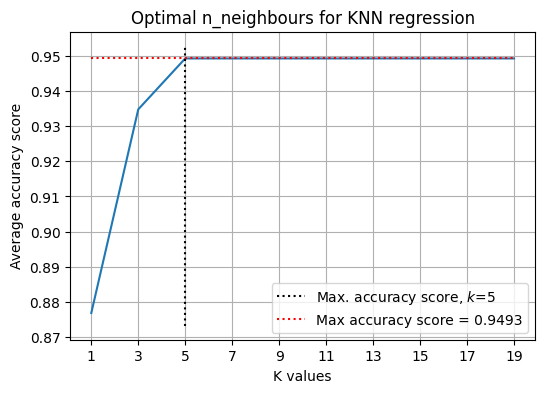

In [35]:
# defining the range of the neighbours
ks = np.arange(1, 20, 2)

# Identifying optimal value of n_neighbours based on average accuracy score
n_repeats = 200
#mse_val = np.zeros((n_repeats, len(ks)))
acc_tr_list = []
acc_val_list = []

for i in tqdm(range(n_repeats)):
    x_train_subset, x_val_subset, y_train_subset, y_val_subset = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
    acc_tr = []
    acc_val = []
    for j, k in enumerate(ks):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train_subset, y_train_subset)
        acc_train = accuracy_score(y_train_subset, model.predict(x_train_subset))
        acc_valid = accuracy_score(y_val_subset, model.predict(x_val_subset))
        acc_tr.append(acc_train)
        acc_val.append(acc_valid)
    acc_tr_list.append(acc_tr)
    acc_val_list.append(acc_val)

# Calculate average accuracy across repeats for each k value
mean_acc_val = np.mean(acc_val_list, axis=0)

# Find the optimal k value that gives the highest average accuracy
optimal_k = ks[np.argmax(mean_acc_val)]
max_acc = max(mean_acc_val)

#print("Optimal value of N neighbours:", optimal_k)

plt.plot(ks, mean_acc_val)
plt.title("Optimal n_neighbours for KNN regression")
plt.xticks(ks)
plt.xlabel("K values")
plt.ylabel("Average accuracy score")
plt.vlines(optimal_k, *plt.ylim(), colors="k", linestyles=":", label=f"Max. accuracy score, $k$={optimal_k}")
plt.hlines(max_acc, min(ks), max(ks), colors="r", linestyles=":", label=f"Max accuracy score = {max_acc:.4f}")
plt.legend()
plt.grid(True)
plt.show()

Based on the plot above, the optimal number of K neighbours is established to be 5 with an average accuracy score of 94.93%. Consequently, this value of k = 5 will be assigned as the parameter within the KNN model algorithm.

Next we will define the KNN regressor model, fit it on the training set and use the model to predict the response variable, Biopsy. The accuracy score of the model is obtained on both the train data and the test set.

In [38]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training set
knn.fit(X_train_scaled, y_train)

#predict the y values, based on training data
y_pred_train = knn.predict(X_train_scaled)


#check the accuracy score on training data
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9373


Based on the training data set, the KNN classifier accuracy is 93.73%.

In [39]:
#Comparison of the model accuracy on the test and
print('Training set score: {:.4f}'.format(knn.score(X_train_scaled, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test_scaled, y_test)))

Training set score: 0.9373
Test set score: 0.9360


Based on the outcome of the comparison of the accuracy scores of the model on the train and test datasets, the accuracy scores are highly comparable with a model accuracy score of 93.73% on the train set and 93.60 on the test set. This eliminates the likelihood of overfitting within the model.

## Decision Tree classifier

A tree-based model involves recursively partitioning the given dataset into two groups based on a certain criterion until a predetermined stopping condition is met (Schonlau & Zou, 2020).

The algorithm of the classification tree is such that it predicts that each observation belongs to the most commonly occuring class of the training observations in the region to which it belongs.

To contsruct the decision tree, we will use the hyper parameters:

*   Criteria as entropy: Entropy is a measure of impurity or disorder in a set of data. Using entropy as the criterion tries to create splits that maximize the information gain and reduce impurity in the resulting subsets.
*   Max-depth will be set to 3. The depth represents the number of levels from the root node to the leaf nodes.
*   Min_sample_leaf will be set to 5. This parameter sets the minimum number of samples required to be at a leaf node. If a split would result in fewer samples than min_samples_leaf, the split is not performed.



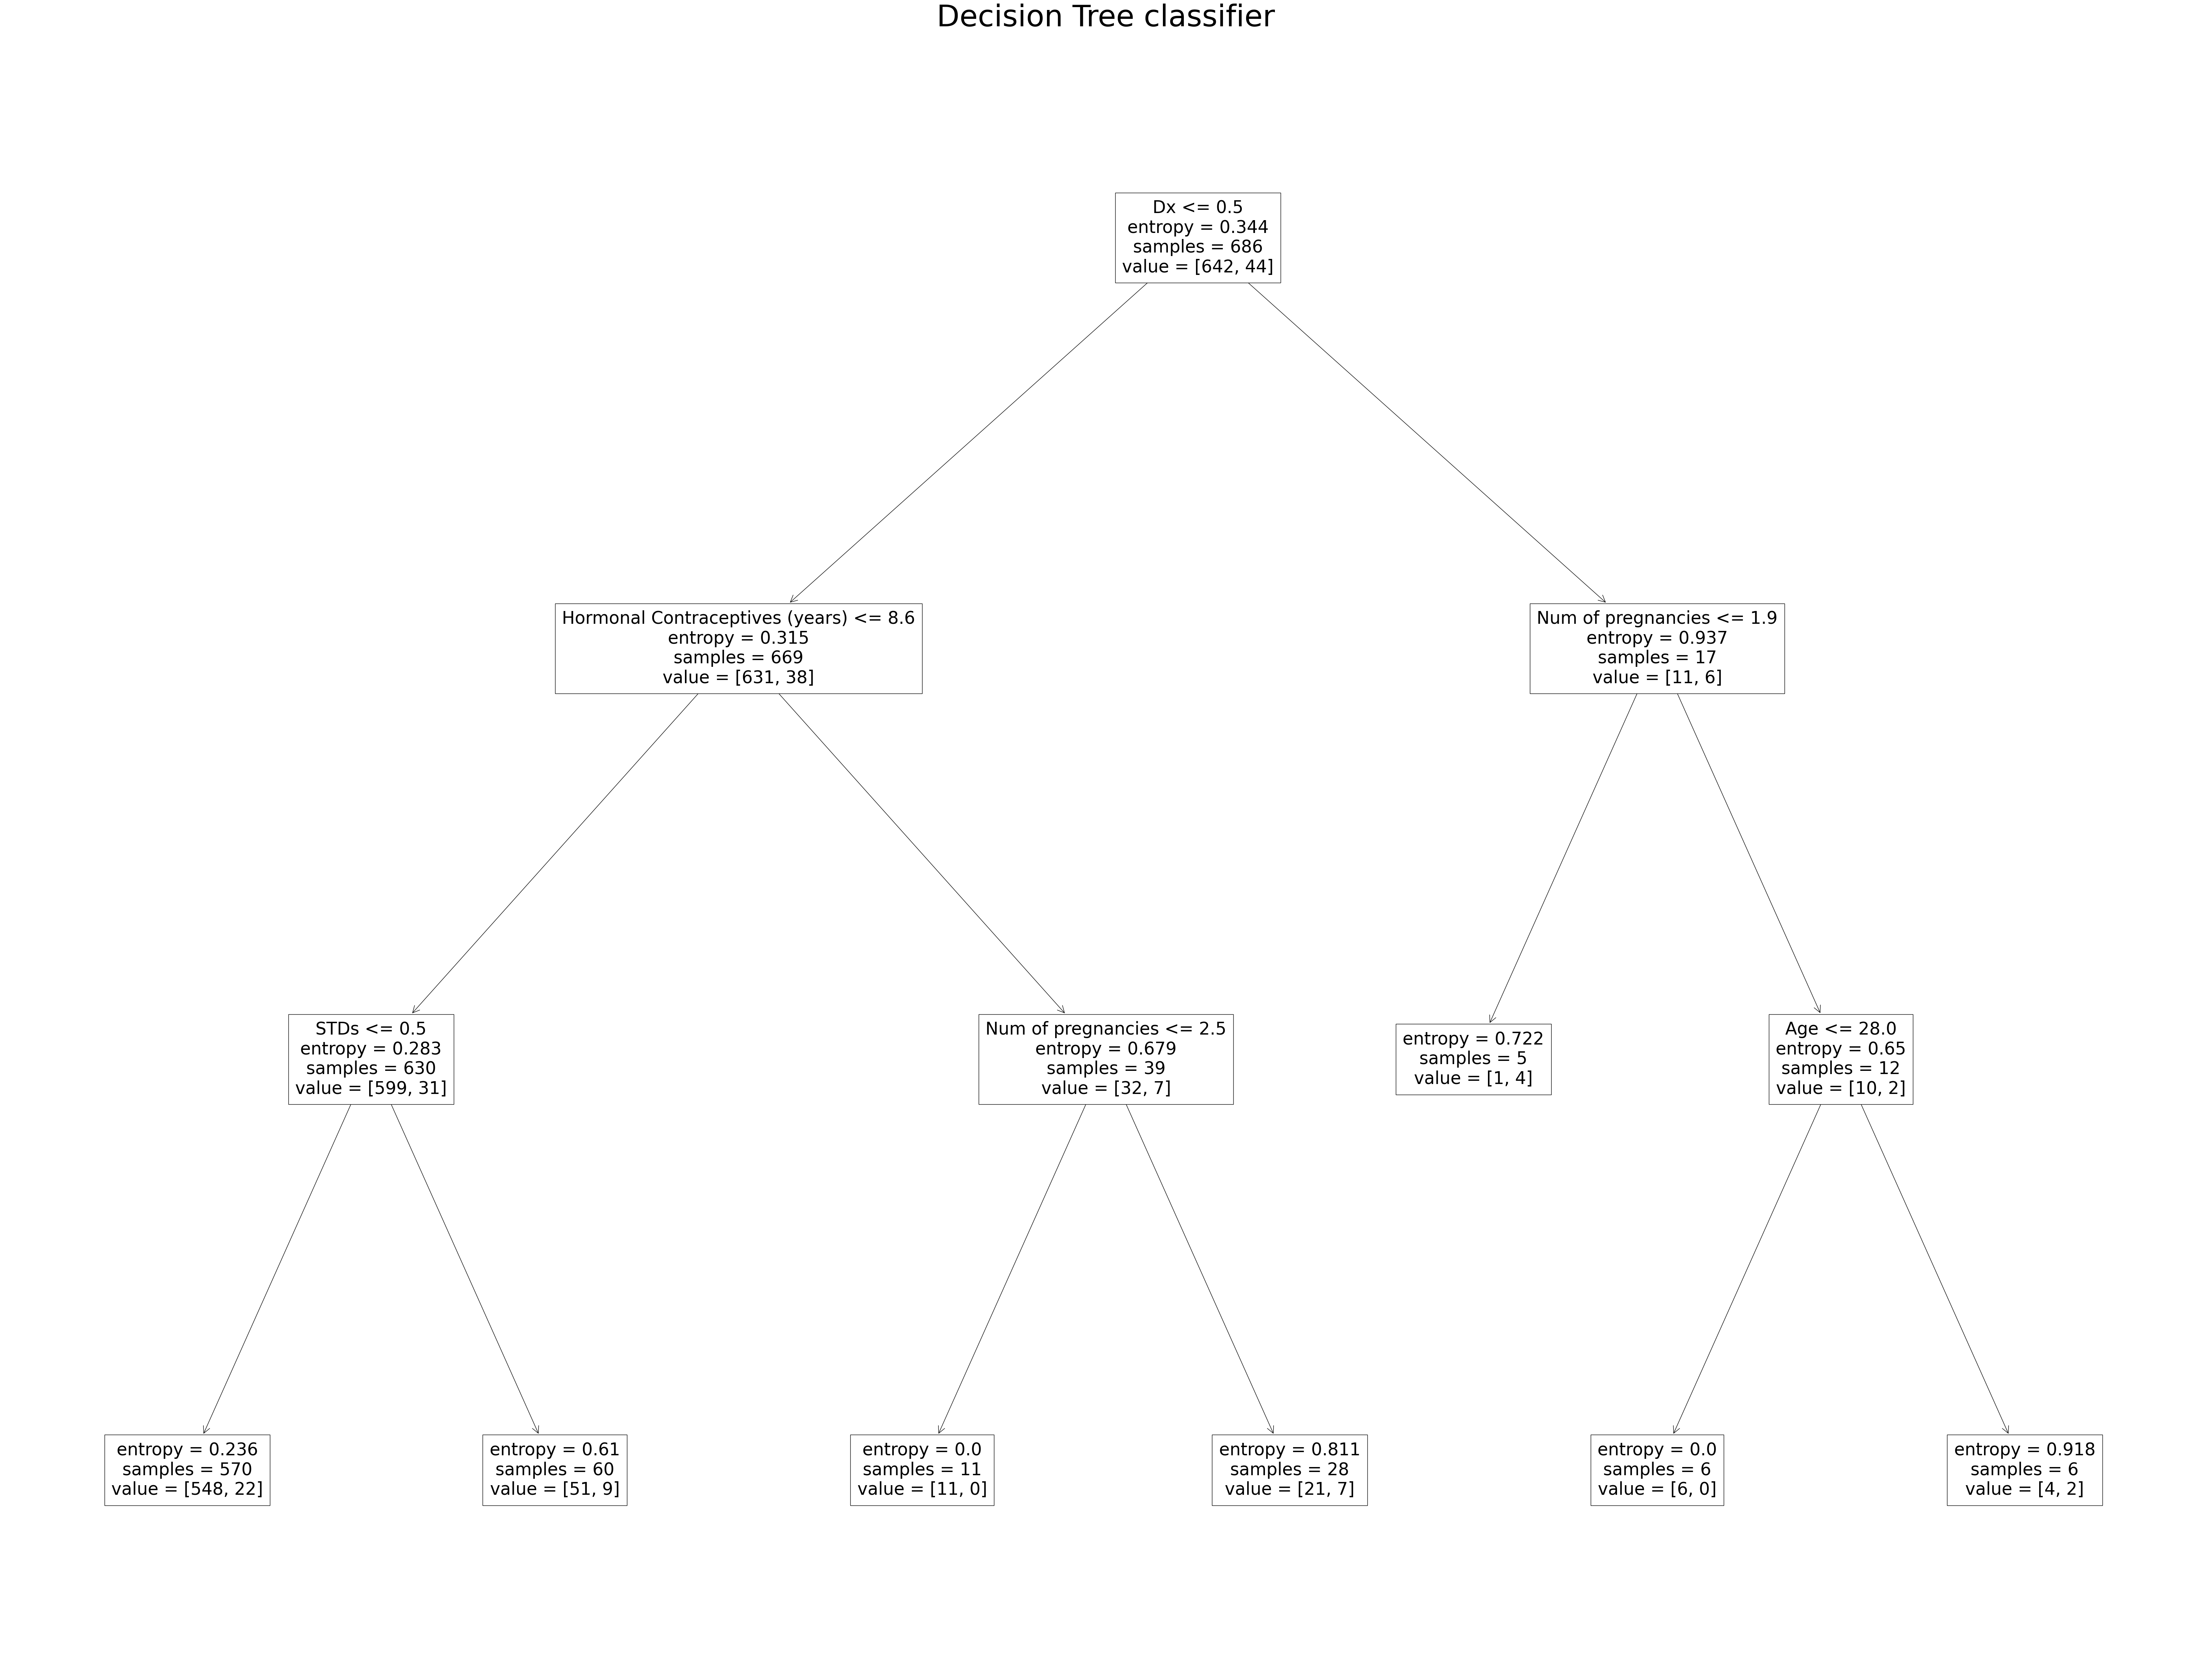

In [48]:
criteria = "entropy"
max_depth = 3
min_sample_leaf = 5
clf_entropy = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=max_depth, min_samples_leaf=min_sample_leaf)
clf_entropy.fit(X_train_imputed, y_train)

plt.figure(figsize=(80,60))  # customize according to the size of your tree
plot_tree(clf_entropy, feature_names = X_train_imputed.columns)
plt.title("Decision Tree classifier", fontsize = 60)
plt.show()

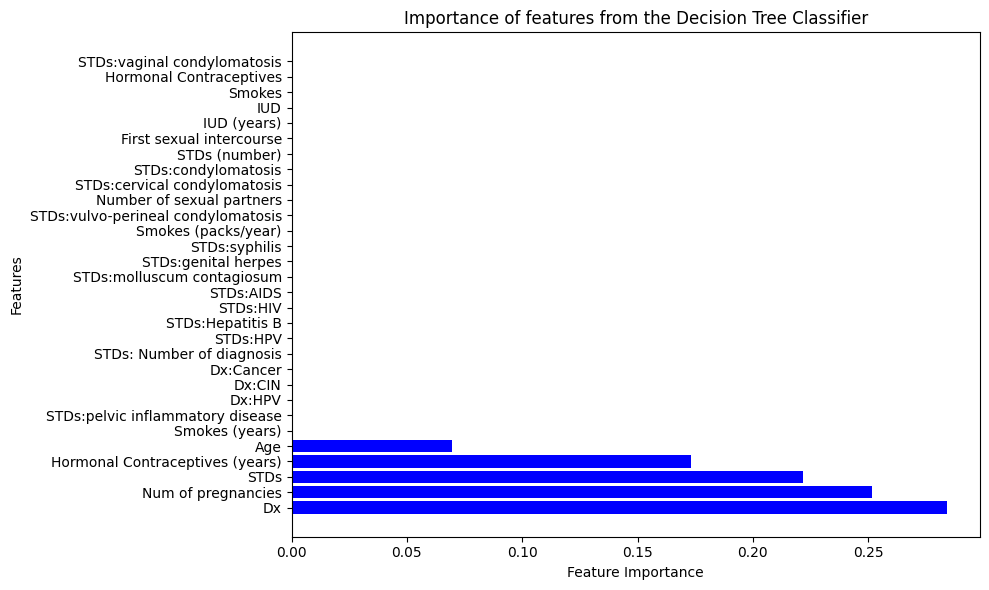

In [49]:
# Extract feature importances
feature_importances = clf_entropy.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X_train_imputed.columns, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], color='b')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Importance of features from the Decision Tree Classifier')
plt.tight_layout()
plt.show()


The visual depiction above illustrates that, when predicting cervical cancer biopsy outcomes, the crucial features for the decision tree classifier are Dx, Number of pregnancies, STDs, Hormonal contraceptives (years), and Age, ranked in descending order of significance from the most critical to the least significant.


In [50]:
#Compute the decision tree accuracy score
print("Model accuracy score on train set: ",clf_entropy.score(X_train_imputed, y_train))
print("Model accuracy score on test set: ",clf_entropy.score(X_test_imputed, y_test))

Model accuracy score on train set:  0.9402332361516035
Model accuracy score on test set:  0.9244186046511628


Upon using the model to predict Biopsy on both the training and test sets, the decision tree classifier has an accuracy score of 94.02% on the train data set which is comparable to the 92.44% accuracy score on the test set. With this level of comparability, we can deduce that there is no overfitting in the decision tree.

A comparison with the KNN classifier, the decision tree classifier has a slightly lower accuracy score of 92.40% compared to the 93.60% accuracy score for the KNN regressor. The KNN regressor gives a better prediction of the Biopsy.

# Random Forest

The random forest model is an ensemble tree-based learning algorithm; that is, the algorithm averages predictions over many individual trees. The individual trees are built on bootstrap samples rather than on the original sample (Schonlau & Zou, 2020).

Using the Grid search approach, we perform hyperparameter tuning for the Random Forest classifier.

In [51]:

max_depth_range = np.arange(1, 10, 1) #controls the maximum depth of the decision trees in the forest

max_features_range = np.arange(1, 10, 1) #controls the maximum number of features to consider when looking for the best split at each node.

param_grid = dict(max_depth=max_depth_range, max_features=max_features_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42) #cross validator with 10 splits.

grid = GridSearchCV(RandomForestClassifier(class_weight = {0: 0.5336538461538461, 1: 7.8125}, random_state=42), param_grid=param_grid, cv=cv)
grid.fit(X_train_imputed, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 9, 'max_features': 6} with a score of 0.93


From the grid search, the best hyper parameters are max_depth as 9 and max_features as 6. These will be applied to in the model building.

In [52]:
#The class weight is defined to mirror that in the dataset, based on the distribution of the classes 0 and 1 within the data
rf_model = RandomForestClassifier(class_weight={0: 0.5336538461538461, 1: 7.8125}, max_depth=9, n_estimators=200, max_features=6, random_state=42, n_jobs=-1)
rf_model.fit(X_train_imputed, y_train)
print("Accuracy of Random Forest Classifier on train data is: {:.4f} ".format(rf_model.score(X_train_imputed, y_train)))

rf_accuracy_test = rf_model.score(X_test_imputed, y_test)
print("Accuracy of Random Forest Classifier on test data is:{:.4f}".format(rf_accuracy_test))

Accuracy of Random Forest Classifier on train data is: 0.9840 
Accuracy of Random Forest Classifier on test data is:0.9302


Although the Random Forest model exhibits an impressive accuracy score of 98.40% on the training data, its performance shows variation when applied to the test data, resulting in an accuracy score of 93.02%. This variation might indicate a likelihood of overfitting by the model. The variation is also explained by the unbalanced distribution of the classes within Biopsy that was exhibited in the exploratory data analysis.

# RBM Support Vector Classifier



Support vector classifiers are supervised learning algorithms that seek to  find an optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space, with the dimension of the hyperlane being dependant on the number of features. The optimal hyperplane will be one whose distance from it to the nearest data point on each side is maximized (James et al., 2023).

Support vector classifiers use a number of kernels however for this study we will focus on the RBM kernel. The model uses scaled data hence the train data set applied to fit the model is the scaled train dataset.

In [53]:
rbf_svc_model = svm.SVC()
rbf_svc_model.fit(X_train_scaled, y_train)

rbf_svc_accuracy = rbf_svc_model.score(X_test_scaled, y_test)
rbf_svc_accuracy_train = rbf_svc_model.score(X_train_scaled, y_train)
print(f"Accuracy of RBF SVM Classifier on training set is:{rbf_svc_accuracy_train}")
print(f"Accuracy of RBF SVM Classifier is:{rbf_svc_accuracy}")


Accuracy of RBF SVM Classifier on training set is:0.9402332361516035
Accuracy of RBF SVM Classifier is:0.936046511627907


The accuracy scores for the RBF support vector classifier are 94.02% and 93.60% on the training and test sets respectively. The RBF support vector classifier outperforms the decision tree classifier and the random forest.

# Application of Principal Component Analysis (PCA) for dimension reduction

In prior sections, we have built machine learning models based on all the 30 predictor variables that are available in the dataset.
Model accuracies are directly influenced by the number of variables used to construct the model. We will explore the use of Principal Component Analysis (PCA) for dimensionality reduction.

principal component analysis transforms a large dataset into a smaller set that still contains the most information about the larger dataset. The algorithm requires scaling of the data hence the scaled dataset will be applied.

The PCA algorithm is such that:
1. The data is centered around the origin to remove any potential bias
2. The covariance matrix of the centred data is computed
3. The eigenvalues and eigen vectors of the covariance matrix are computed. Eigenvectors represent the directions of maximum variance in the data, while eigenvalues signify the amount of variance along those directions.
4. Sort the eigenvectors in descending order (in order to prioritize the most significant components,
5. Select the principal components that capture the most variability in the data
6. Finally, the original data is projected onto the selected principal components. This creates a new set of features.

In the section below, we identify the number of components that capture the most variability.



In [57]:
pca = PCA(
    n_components=30,
    copy=True,
    random_state=42
)
pca = pca.fit(X_train_imputed)

In [58]:
# Get the explained variance ratio for each of the selected principal components
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative sum of explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


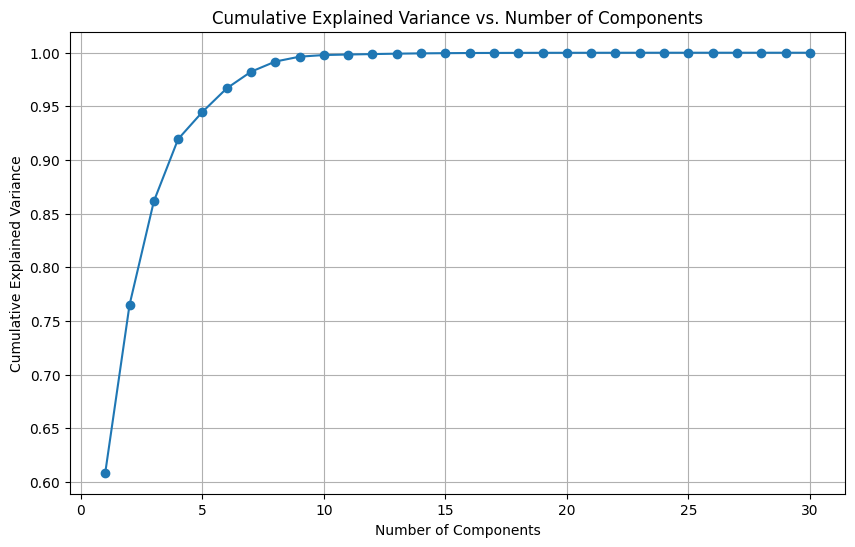

In [59]:
# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

The plot depicting the relationship between cumulative explained variance and the number of components reveals some clear patterns. Notably, the initial principal component explains approximately 76% of the data's variability. Complete coverage of data variability is achieved with just 10 principal components. Beyond the tenth component, the curve levels off, indicating a diminishing change in variability.

Based on this component, we will apply 10 principal components in the lower dimension data. The machine learning algorithms will be reapplied to the lower dimension data. The hyper parameters from earlier sections will be maintained.

In [61]:
#create pipeline with PCA and KNN classifier
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca',PCA(n_components=10)),
    ('knn_2', KNeighborsClassifier(n_neighbors=5)),
    #('rf', RandomForestClassifier()),
    #('svm', SVC())
])

#fit pipeline to the train data
knn_pipeline.fit(X_train_imputed, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('knn_2', KNeighborsClassifier())])

In [62]:
acc_tr = accuracy_score(y_train, knn_pipeline.predict(X_train_imputed))
acc_te = accuracy_score(y_test, knn_pipeline.predict(X_test_imputed))
print("Accuracy score of KNN classifier on train set: {:.4f}".format(acc_tr))
print("Accuracy score of KNN classifier on test set: {:.4f}".format(acc_te))

Accuracy score of KNN classifier on train set: 0.9359
Accuracy score of KNN classifier on test set: 0.9302


The KNN classifier built on the lower dimension data has a reduced accuracy scores on both the training and test sets, 93.59% and 93.02% respectively compared to the higher dimension model (93.73% training score and 93.60% on test data).
The dimensionality reduction is reducing the accuracy score for the KNN classifier for this dataset.

In [63]:
#Build pipeline for the Decision tree classifier
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca',PCA(n_components=10)),
    ('decision_tree', DecisionTreeClassifier(criterion="entropy", random_state=100,
                                max_depth=3, min_samples_leaf=7))
])

#fit pipeline to the train data
dt_pipeline.fit(X_train_imputed, y_train)

#Extract the accuracy scores
print("Accuracy score of Decision Tree classifier on train set: {:.4f}".format(accuracy_score(y_train, dt_pipeline.predict(X_train_imputed))))
print("Accuracy score of Decision Tree classifier on test set: {:.4f}".format(accuracy_score(y_test, dt_pipeline.predict(X_test_imputed))))

Accuracy score of Decision Tree classifier on train set: 0.9388
Accuracy score of Decision Tree classifier on test set: 0.9419


The accuracy score of the decision tree classifier improves in the lower dimension data, from an accuracy score of 92.44% on test data to 94.19%. Based on this dataset, the decision tree classifier performs better with the lower dimension data.

In [64]:
#Pipeline for the Random forest classifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca',PCA(n_components=10)),
    ('rf', RandomForestClassifier(class_weight={0: 0.5336538461538461, 1: 7.8125}, random_state=42, n_jobs=-1))
])

#fit pipeline to the train data
rf_pipeline.fit(X_train_imputed, y_train)

#Extract the accuracy scores
print("Accuracy score of Random Forest classifier on train set: {:.4f}".format(accuracy_score(y_train, rf_pipeline.predict(X_train_imputed))))
print("Accuracy score of Random Forest classifier on test set: {:.4f}".format(accuracy_score(y_test, rf_pipeline.predict(X_test_imputed))))

Accuracy score of Random Forest classifier on train set: 0.9956
Accuracy score of Random Forest classifier on test set: 0.9302


With the lower dimension data, the accuracy score of the random forest on the training set greatly improves from 98.04% to 99.56%. However the accuracy on the test set remains unchanged at 93.02%.

In [65]:
#Pipeline for RBF support vector machine
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca',PCA(n_components=7)),
    ('svm', SVC())
])

#fit pipeline to the train data
svm_pipeline.fit(X_train_imputed, y_train)

#Extract the accuracy scores
print("Accuracy score of Support Vector machine on train set: {:.4f}".format(accuracy_score(y_train, svm_pipeline.predict(X_train_imputed))))
print("Accuracy score of Support vector machine on test set: {:.4f}".format(accuracy_score(y_test, svm_pipeline.predict(X_test_imputed))))

Accuracy score of Support Vector machine on train set: 0.9373
Accuracy score of Support vector machine on test set: 0.9360


There is a slight reduction in the training accuracy scores of the RBF support vector classifier on the lower dimension data, from 94.02% to 93.73%. The accuracy scores on the test data however remained constant at 93.60%

# Lasso Regression

To address our guiding question: What are the major risk factors for cervical cancer? we will apply Lasso regression for parameter tuning.

Lasso uses a penalty term to select a subset of the most important features while shrinking the coefficients of less important features to zero.

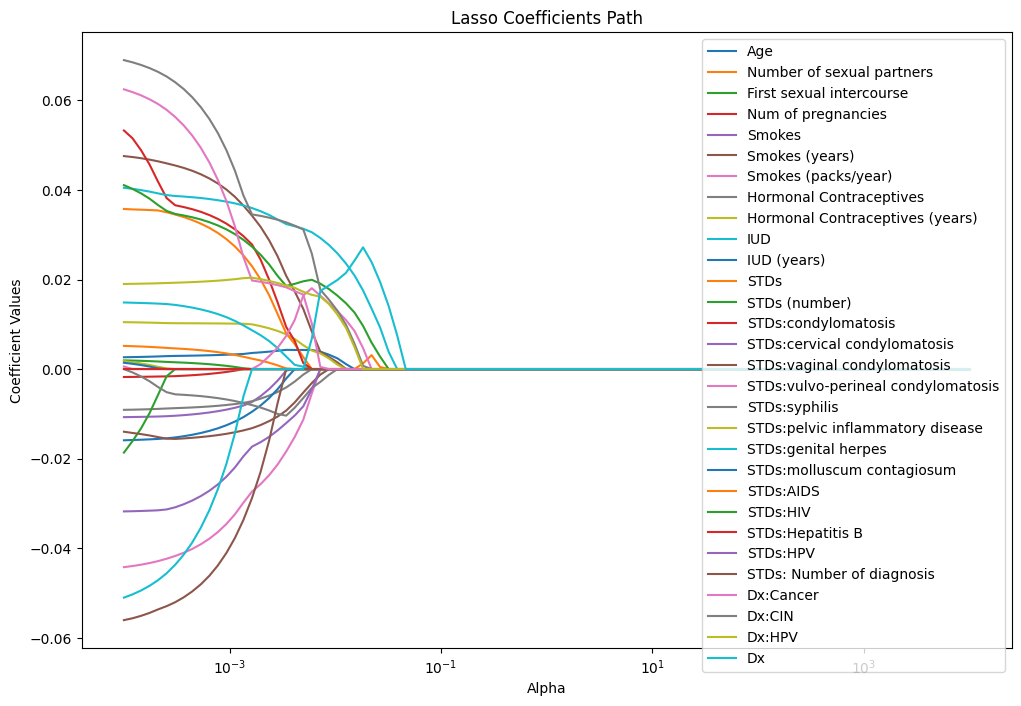

In [66]:
# Create a list of alphas (penalty values) to try in the Lasso regression
alphas = np.logspace(-4, 4, 100)

# Initialize an empty array to store feature importance scores
coef_values = []


for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(X_train_scaled, y_train)
    coef_values.append(lasso.coef_)

# Convert the list of coefficient values into a DataFrame
coefs_df = pd.DataFrame(coef_values, columns=X_train_scaled.columns)

# Plotting the coefficients over different alphas
plt.figure(figsize=(12, 8))
plt.plot(alphas, coefs_df)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Values')
plt.title('Lasso Coefficients Path')
plt.legend(X_train_scaled.columns, loc='upper right')
plt.axis('tight')
plt.show()

The magnitude of a coefficient indicates the strength of the relationship between the corresponding feature and the target variable. Larger coefficients imply a stronger impact on the target variable's prediction.

The sign of a coefficient (+ or -) indicates the direction of the relationship between the feature and the target variable. A positive coefficient suggests a positive correlation, meaning as the feature increases, the target variable tends to increase as well. A negative coefficient suggests a negative correlation.

The coefficient of zero means that those features have effectively been removed from the model. The coefficients of non-zero features indicate their importance in the model, while the coefficients of zero features are excluded.

Based on the magnitudes of the coefficients, we will proceed to extract the most important features for prediction.


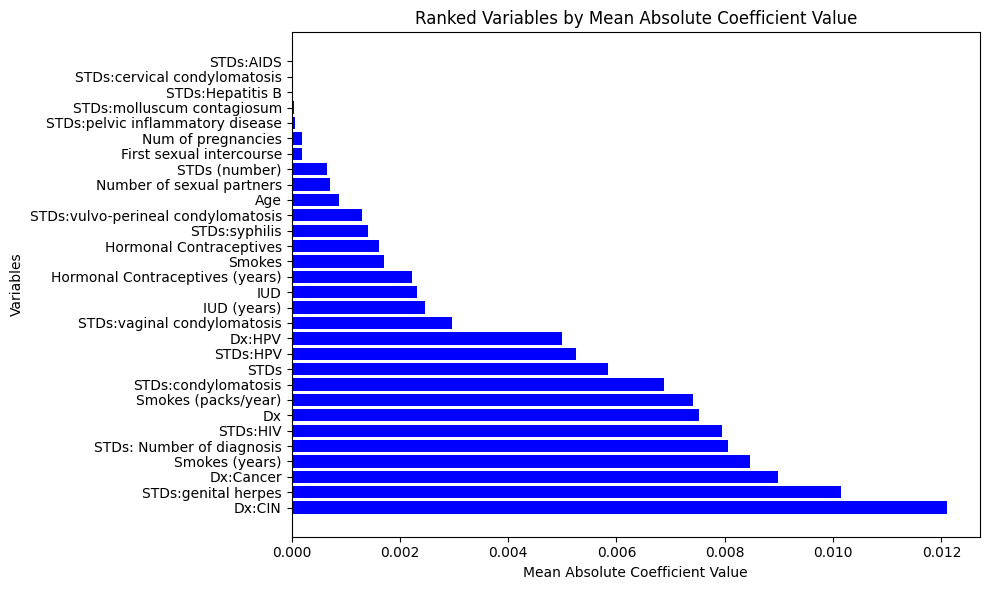

In [67]:
# Calculate the mean absolute coefficient values for each variable across different alphas
coefs_mean_abs = np.abs(coefs_df).mean()


sorted_vars = coefs_mean_abs.sort_values(ascending=False).index

# Plot the ranked variables using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_vars)), coefs_mean_abs[sorted_vars], color='b')
plt.yticks(range(len(sorted_vars)), sorted_vars)
plt.xlabel('Mean Absolute Coefficient Value')
plt.ylabel('Variables')
plt.title('Ranked Variables by Mean Absolute Coefficient Value')
plt.tight_layout()
plt.show()


From the Ranked Variables by Mean Absolute Coefficient Value plot, in order of importance, the top 5 cervical cancer risk factors that lead to biopsy examination are: Dx:CIN, STDs: genital herpes, Dx:Cancer, Smokes (years) and STDs: Number of diagnosis.

# Model Assessment

The accuracy scores of the models will vary depending on the split of the training and test sets. Inorder to eliminate this dependency, we use the K-fold corss validation method to evaluate the performance of the various models.

In [68]:
#Impute the X values
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False, keep_empty_features=False)
X_imputed = pd.DataFrame(imputer.fit_transform(X[:]),columns = X.columns)

#Identify the binary variables and round the imputed values to either 1 or 0
binary_cols = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis',
             'STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV',
             ]
for col in binary_cols:
  X_imputed[col] = X_imputed[col].apply(lambda x: 1 if x >= 0.5 else 0)

#X_imputed.isna().sum()

#Scale X for the KNN classifier that requires scaled data

scaler = StandardScaler()
cols = X_imputed.columns

#All the attributes which are non binary will be scaled
scaled_attr = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies','Smokes (years)',
               'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)']

for attr in scaled_attr:
  X_scaled = scaler.fit_transform(X_imputed)


X_scaled = pd.DataFrame(X_scaled, columns = cols)


X_scaled.head(3)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,-1.038563,0.894360,-0.717731,-0.892213,-0.409081,-0.300771,-0.205381,-1.36033,-0.617365,-0.335917,...,-0.034159,0.0,-0.146385,-0.034159,-0.048337,-0.289093,-0.146385,-0.10296,-0.146385,-0.169638
1,-1.391796,-0.924893,-1.072994,-0.892213,-0.409081,-0.300771,-0.205381,-1.36033,-0.617365,-0.335917,...,-0.034159,0.0,-0.146385,-0.034159,-0.048337,-0.289093,-0.146385,-0.10296,-0.146385,-0.169638
2,0.845342,-0.924893,2.479638,-0.892213,-0.409081,-0.300771,-0.205381,-1.36033,-0.617365,-0.335917,...,-0.034159,0.0,-0.146385,-0.034159,-0.048337,-0.289093,-0.146385,-0.10296,-0.146385,-0.169638


In [69]:

#Apply Cross validation to the various models and obtain the accuracies
model_1 = KNeighborsClassifier(n_neighbors=5)
model_2 = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
model_3 = RandomForestClassifier(class_weight={0: 0.5336538461538461, 1: 7.8125}, random_state=42, n_jobs=-1)
model_4 = svm.SVC()

cv = 10 #Apply 10 k folds

#Obtain the accuracy scores for each of the models using the k-fold cross validation
accuracy_1 = cross_val_score(model_1, X_scaled, y, scoring = 'accuracy', cv = cv)
accuracy_2 = cross_val_score(model_2, X_imputed, y, scoring = 'accuracy', cv = cv)
accuracy_3 = cross_val_score(model_3, X_imputed, y, scoring = 'accuracy', cv = cv)
accuracy_4 = cross_val_score(model_4, X_imputed,y, scoring = "accuracy", cv = cv)


print("Accuracy score for the KNN classifier is:{:.2f}%".format(accuracy_1.mean()*100))
print("Accuracy score for the Decisison tree is:{:.2f}%".format(accuracy_2.mean()*100))
print("Accuracy score for the Random Forest is:{:.2f}%".format(accuracy_3.mean()*100))
print("Accuracy score for the Support Vector Classifier is:{:.2f}%".format(accuracy_4.mean()*100))

Accuracy score for the KNN classifier is:93.01%
Accuracy score for the Decisison tree is:92.42%
Accuracy score for the Random Forest is:93.59%
Accuracy score for the Support Vector Classifier is:93.59%


With the K-fold cross validation approach, the Random forest and the Support vector classifier models have the highest accuracy scores of 93.59%. The KNN classifier follows in suit with an accuracy score of 93.01% while the Decision tree has an accuracy score of 92.42%.

Based on the data set and the machine learning algorithms adopted, the Random Forest and RBF support vector classifiers are best suited for predicting the decision for a biopsy examination.



#Conclusion

The dataset for the study was quite small and with heavy class imbalance within the target variable. This greatly influences the accuracies of the models.

Taking into account the available data on risk factors and the decision-making process for undergoing a Biopsy examination, it can be inferred that both Random Forest and Support Vector Classifiers emerge as among the top-performing models for predicting the likelihood of a patient exhibiting the set of risk factors to be referred for a biopsy examination.

#Appendix

#Artificial Neural Network

This section was not initially a part of our scope. It has been included to demonstrate the application of yet another machine learning algorithm as a test of our understanding. It is subject to further improvements

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


#Model Architecture and Training Summary

In [71]:
# Create the model
model = Sequential()
# Input layer
model.add(Dense(units=400, activation='relu', input_dim=30))
model.add(Dropout(0.5))
# Hidden layers
model.add(Dense(units=300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense(units=1, activation='sigmoid'))
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model with early stopping
train_history = model.fit(X_train_imputed, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stopping])
# Print the summary of the model
#model.summary()


Epoch 1/50
18/18 [==============================] - 3s 34ms/step - loss: 0.7630 - accuracy: 0.8558 - val_loss: 0.3120 - val_accuracy: 0.9420
Epoch 2/50
18/18 [==============================] - 0s 15ms/step - loss: 0.3839 - accuracy: 0.9179 - val_loss: 0.4709 - val_accuracy: 0.9420
Epoch 3/50
18/18 [==============================] - 0s 14ms/step - loss: 0.3645 - accuracy: 0.9197 - val_loss: 0.3880 - val_accuracy: 0.9420
Epoch 4/50
18/18 [==============================] - 0s 14ms/step - loss: 0.3138 - accuracy: 0.9288 - val_loss: 0.3761 - val_accuracy: 0.9420
Epoch 5/50
18/18 [==============================] - 0s 15ms/step - loss: 0.3608 - accuracy: 0.9288 - val_loss: 0.4169 - val_accuracy: 0.9420
Epoch 6/50
18/18 [==============================] - 0s 14ms/step - loss: 0.3553 - accuracy: 0.9270 - val_loss: 0.3515 - val_accuracy: 0.9420
Epoch 7/50
18/18 [==============================] - 0s 14ms/step - loss: 0.3282 - accuracy: 0.9270 - val_loss: 0.4112 - val_accuracy: 0.9420
Epoch 8/50
18

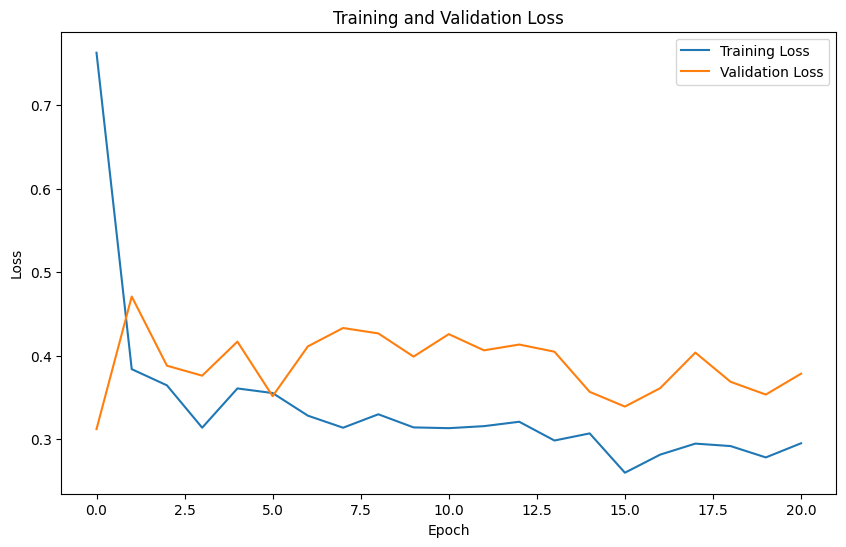

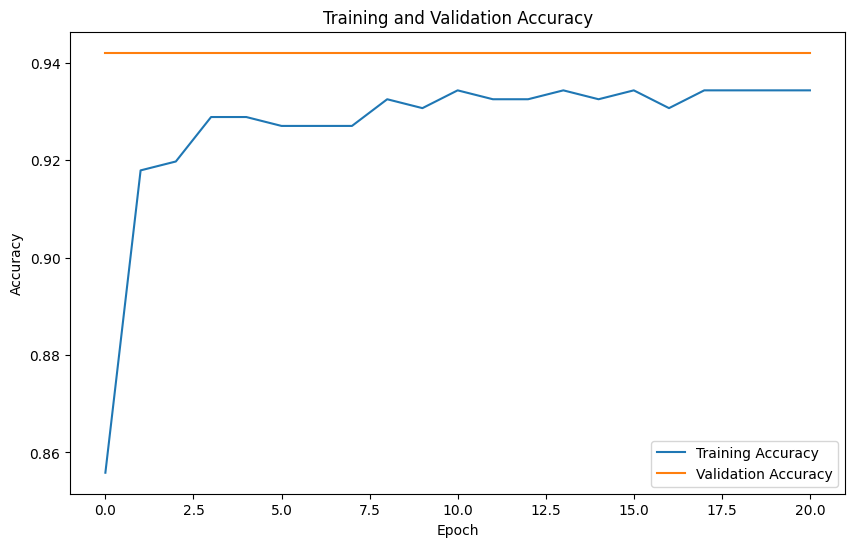

In [72]:
# Visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_history.history['loss'], label='Training Loss')
plt.plot(train_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Visualize the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_history.history['accuracy'], label='Training Accuracy')
plt.plot(train_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set

In [74]:
test_loss, test_accuracy = model.evaluate(X_test_imputed, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


6/6 [==============================] - 0s 7ms/step - loss: 0.3238 - accuracy: 0.9360
Test Loss: 0.3237548768520355
Test Accuracy: 0.9360465407371521


#Neural Network Model Assessment

The output result shows that the model seems to be performing well with relatively high accuracy and reasonably low loss values.

**Training Results:** The training history provides information about the model's performance during training. It shows that the training accuracy is consistently high (around 93-94%), and the training loss is relatively low (around 0.29-0.33). These values indicate that the model is effectively learning the patterns present in the training data.

**Validation Results:** The validation accuracy and loss are also stable across epochs, showing values similar to the training metrics. This suggests that the model is not overfitting, as the validation metrics are in line with the training metrics. Generally, it's a positive sign when the validation metrics are close to the training metrics.

**Test Results: **The test loss is reported as approximately 0.292, and the test accuracy is around 0.936. These values are in line with the training and validation metrics, indicating that the model's performance on unseen data (test set) is consistent with its performance on the training and validation sets. An accuracy of 0.936 suggests that the model can make accurate predictions on new, unseen data.

Test Results and Biopsy Prediction: The ultimate measure of a model's effectiveness lies in its ability to predict outcomes on unseen data, such as the test set. In our case, the test loss is reported as approximately 0.2971, which indicates that the model's predictions are close to the actual biopsy outcomes on average. The test accuracy, around 0.9420, highlights that the model successfully predicted biopsy outcomes with a high degree of accuracy.

The model has shown a strong capability to make accurate predictions regarding biopsy outcomes. These predictions can potentially assist medical professionals in identifying cases that require closer examination or intervention.

# References


1.   UCI Machine Learning Repository. (n.d.). UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors

2. Schonlau, M., & Zou, R. Y. (2020, March). The random forest algorithm for statistical learning. The Stata Journal: Promoting Communications on Statistics and Stata, 20(1), 3–29. https://doi.org/10.1177/1536867x20909688

3. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023, July 1). An Introduction to Statistical Learning: With Applications in Python. Springer.


